# importing lib

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib. pyplot as plt
import seaborn as sns

# understading the data

In [2]:
data=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data=data.rename(columns={"v1":"label","v2":"text"})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.shape

(5572, 2)

In [7]:
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 5572
Number of columns 2


In [8]:
data.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
data.duplicated().sum()

403

In [10]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [11]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data["length"]=data["text"].apply(len)
data.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

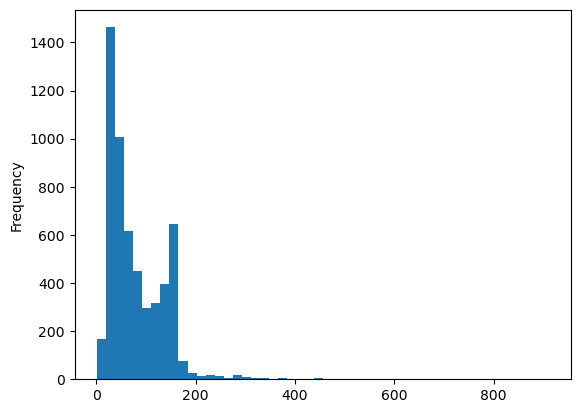

In [13]:
data['length'].plot(bins=50,kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

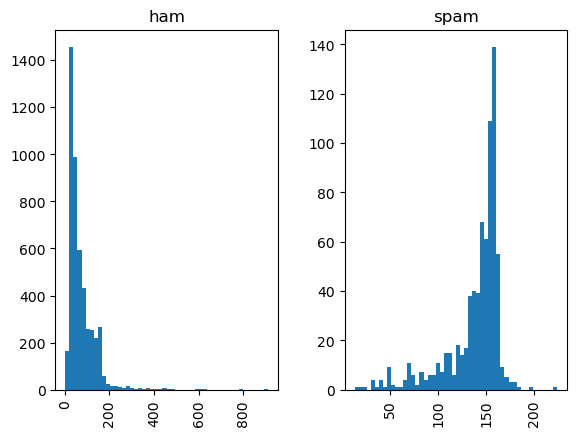

In [14]:
data.hist(column='length', by='label', bins=50)

In [15]:
data.loc[data['label']=='spam','label',]=0
data.loc[data['label']=='ham','label',]=1

In [16]:
x=data["text"]

In [17]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [18]:
y=data['label']

In [19]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: object

In [41]:
import re
import string
from nltk.corpus import stopwords
import nltk
stopwd = stopwords.words('english')
def clean_text(text):

    text= text.lower() # Lowercasing the text
    text = re.sub('-',' ',text.lower())   # Replacing `x-x` as `x x`
    text = re.sub(r'http\S+', '', text) # Removing Links
    text = re.sub(f'[{string.punctuation}]', '', text) # Remove punctuations
    text = re.sub(r'\s+', ' ', text) # Removing unnecessary spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Removing single characters
    
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stopwd and len(i)>2]) # Removing the stop words

    return text.strip()

In [44]:
data["clean_text"] = data["text"].apply(clean_text)

In [46]:
data.head(5)

,label,text,length,clean_text
0,1,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy available bugis great world...
1,1,Ok lar... Joking wif u oni...,29,lar joking wif oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win cup final tkts 21st m...
3,1,U dun say so early hor... U c already then say...,49,dun say early hor already say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [48]:
print(x_train.shape,x_test.shape)

(4457,) (1115,)


In [49]:
print(y_train.shape,y_test.shape)

(4457,) (1115,)


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [51]:
print(x_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: text, Length: 4457, dtype: object


In [52]:
print(x_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [54]:
model.fit(x_train_features,y_train)

LogisticRegression()

In [55]:
predict=model.predict(x_train_features)

In [56]:
predict

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_train,predict)

In [58]:
print("accuarcy of train:",accuracy)

accuarcy of train: 0.9661207089970832


In [59]:
predict_test=model.predict(x_test_features)

In [60]:
predict_test

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
accuracy=accuracy_score(y_test,predict_test)

In [62]:
print("accuarcy of test:",accuracy)

accuarcy of test: 0.9623318385650225


# testing with data

In [66]:
input_your_mail = ["URGENT! You have won a 1 week FREE membership in our �100,000 Prize Jackpot! Txt the word: CLAIM to ..."]
input_feature_model=feature_extraction.transform(input_your_mail)
prediction=model.predict(input_feature_model)
print(prediction)
if(prediction[0]==1):
    print('Ham Mail')
else:
    print('spam mail')

[0]
spam mail
